<a href="https://colab.research.google.com/github/Hugo-Fuente/TrabalhoFSI/blob/master/EstudiososAlunos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

db = pd.read_csv("StudentsPerformance.csv")
db

,gender,race,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [36]:
db['gender'] = db["gender"].str.replace("female", '0').str.replace('male', '1').astype("float")
db['lunch'] = db["lunch"].str.replace("free/reduced", '0').str.replace('standard', '1').astype("float")
db['test_preparation_course'] = db["test_preparation_course"].str.replace("none", '0').str.replace('completed', '1').astype("float")
db.head()

,gender,race,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0.0,group B,bachelor's degree,1.0,0.0,72,72,74
1,0.0,group C,some college,1.0,1.0,69,90,88
2,0.0,group B,master's degree,1.0,0.0,90,95,93
3,1.0,group A,associate's degree,0.0,0.0,47,57,44
4,1.0,group C,some college,1.0,0.0,76,78,75


In [37]:
db.math_score.describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math_score, dtype: float64

In [38]:
db.reading_score.describe()

count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading_score, dtype: float64

In [39]:
db.writing_score.describe()

count    1000.000000
mean       68.054000
std        15.195657
min        10.000000
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: writing_score, dtype: float64

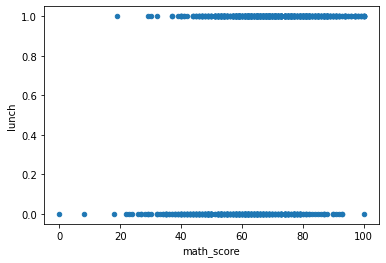

In [40]:
db.plot.scatter(x = 'math_score', y = 'lunch')

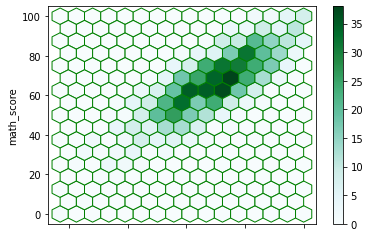

In [41]:
db.plot.hexbin(x = 'reading_score', y = 'math_score', gridsize=15, color="green")

In [0]:
from sklearn.neighbors import KNeighborsClassifier # Passo 1
model_neighbors = KNeighborsClassifier() # Passo 2

In [43]:
# Passo 3.1 - Feature Matrix
X_db = db.loc[ : , ["lunch","math_score", "writing_score", "reading_score"]]
X_db.head()

,lunch,math_score,writing_score,reading_score
0,1.0,72,74,72
1,1.0,69,88,90
2,1.0,90,93,95
3,0.0,47,44,57
4,1.0,76,75,78


In [44]:
# Passo 3.2 - Target Array
y_db = db.lunch
y_db.head()

0    1.0
1    1.0
2    1.0
3    0.0
4    1.0
Name: lunch, dtype: float64

In [0]:
# Passo 3.3 - Separação do banco de dados
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_db, y_db, random_state=42)

In [46]:
# Passo 4 - ajuste o modelo aos dados
model_neighbors.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
# Passo 5 - faça predições em dados novos
y_model_neigh = model_neighbors.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model_neigh)

0.636

In [49]:
from sklearn.naive_bayes import GaussianNB
model_bayes = GaussianNB()
model_bayes.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [50]:
y_bayes = model_bayes.predict(X_test)
y_bayes

array([1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1.

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_bayes)

1.0

In [52]:
from sklearn.model_selection import cross_val_score
cross_val_score(model_bayes, X_db, y_db, cv=5 )

array([1., 1., 1., 1., 1.])

In [53]:
from sklearn.ensemble import RandomForestClassifier
model_rnd_forest = RandomForestClassifier()
model_rnd_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
y_rnd_forest = model_rnd_forest.predict(X_test)
accuracy_score(y_test, y_rnd_forest)

1.0

In [55]:
from sklearn.tree import DecisionTreeClassifier #Passo 1
model1 = DecisionTreeClassifier() #Passo2
#Ja fez o 3 antes
model1.fit(X_train, y_train) #Passo4

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
#Passo 5
y_model1 = model1.predict(X_test)

In [57]:
accuracy_score(y_test, y_model1)

1.0